<a href="https://colab.research.google.com/github/wahyufajar879/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma correction pada citra
---------------------------------
Masukkan nilai Gamma: 3


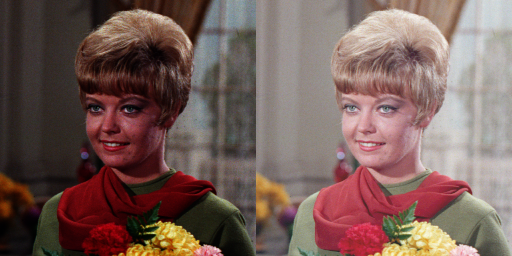

In [3]:
# 1. Buat Gamma Correction sesuai dengan petunjuk berikut 

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma correction pada citra')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 2


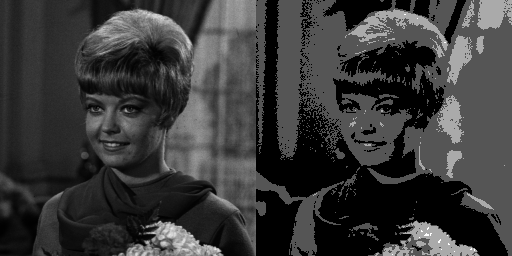

In [10]:
# 2. Buat Simulasi Image Depth

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/female.tiff', cv.IMREAD_GRAYSCALE) 
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255/(bit-1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    gamma_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 5
Nilai PSNR = 27.543236113001107 dB
Nilai MSE = 114.48715137768818


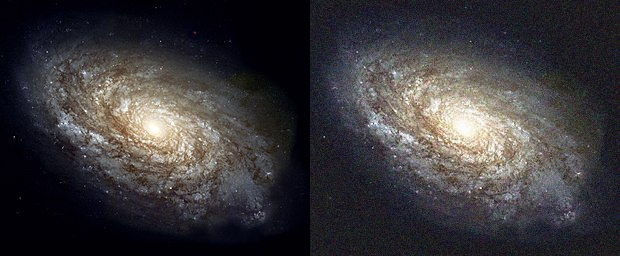

In [105]:
# 3. Buat modul Average Denoising 

# Nilai DB = 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5/picture/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[4]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
mse = np.mean((original-compressed)**2)
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')
print('Nilai MSE =',mse)


final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai PSNR = 27.52587857705541 dB
Nilai MSE = 114.94564012096774


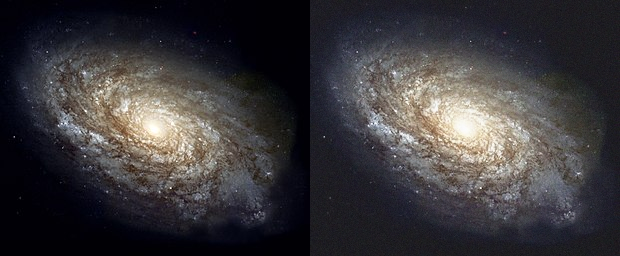

In [106]:
# Nilai DB = 30

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5/picture/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[29]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(29):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
mse = np.mean((original-compressed)**2)
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 30')
print('Nilai PSNR =', psnr, 'dB')
print('Nilai MSE =',mse)
final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 60
Nilai PSNR = 27.491066712863507 dB
Nilai MSE = 115.87071572580645


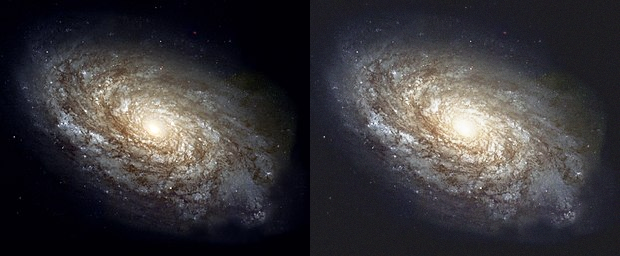

In [107]:
# Nilai DB = 60

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5/picture/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[59]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(59):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
mse = np.mean((original-compressed)**2)
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 60')
print('Nilai PSNR =', psnr, 'dB')
print('Nilai MSE =',mse)
final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 80
Nilai PSNR = 27.504566837023656 dB
Nilai MSE = 115.51108870967742


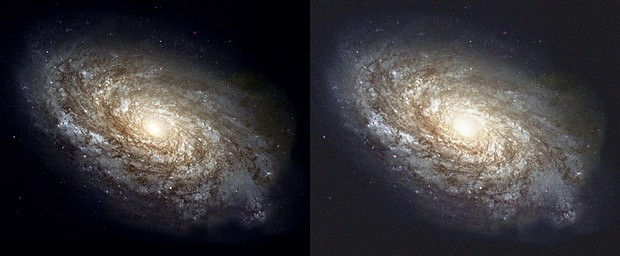

In [108]:
# Nilai DB = 80

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5/picture/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[79]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(79):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
mse = np.mean((original-compressed)**2)
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 80')
print('Nilai PSNR =', psnr, 'dB')
print('Nilai MSE =',mse)
final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 100
Nilai PSNR = 27.513741737028372 dB
Nilai MSE = 115.26731770833334


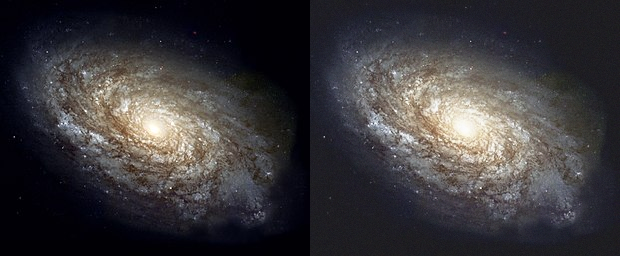

In [109]:
# Nilai DB = 100

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/week5/picture/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[99]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
mse = np.mean((original-compressed)**2)
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 100')
print('Nilai PSNR =', psnr, 'dB')
print('Nilai MSE =',mse)
final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

 Dari hasil PSNR yang saya catat pada tabel diatas, kesimpulan yang dapat diambil adalah jika hasil PSNR semakin bertambah maka hasil citra dari gambar tersebut semakin jernih atau noise dari gambar tersebut semakin hilang. Jika hasil PSNR semkain berkurang maka hasil citra dari gambar tersebut semakin banyak noisenya. • Adapun MSE merupakan rata-rata kuadrat selisih antara nilai yang dilihat dan nilai yang diprediksi dari suatu variabel. Bila MSEnya 0, berarti tidak ada noise dalam sinyal, dan nilai PNSR menjadi tidak terlalu penting.

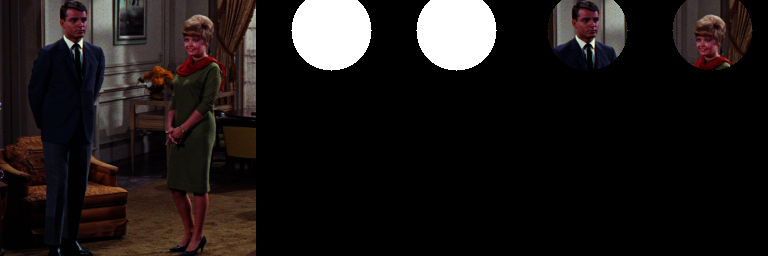

In [99]:
# 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), 
#    sedangkan image kanan adalah hasilnya

original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/couple.tiff')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 30), 40, (255,255,255), -1)
masked = original & mask 

mask1 = cv.circle(mask, (200, 30), 40, (255,255,255), -1)
masked = original & mask1 


rose_frame = cv.hconcat((original, mask, masked))
cv2_imshow(rose_frame)


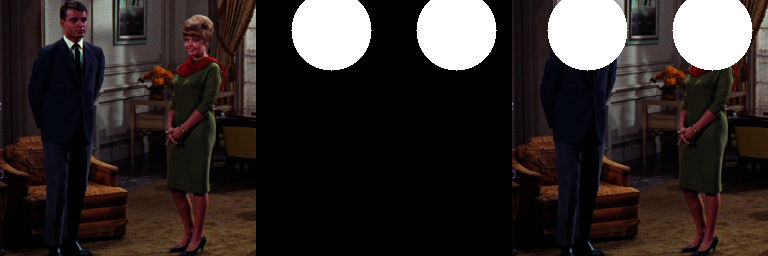

In [100]:
# 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. 
# Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

# OR
original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/couple.tiff')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 30), 40, (255,255,255), -1)
masked = original | mask 

mask1 = cv.circle(mask, (200, 30), 40, (255,255,255), -1)
masked = original | mask1 


rose_frame = cv.hconcat((original, mask, masked))
cv2_imshow(rose_frame)


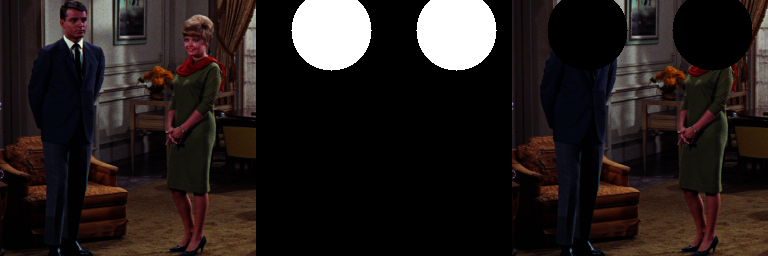

In [101]:
# 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. 
# Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

# NOT
original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/couple.tiff')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 30), 40, (255,255,255), -1)
masked = original & ~mask 

mask1 = cv.circle(mask, (200, 30), 40, (255,255,255), -1)
masked = original & ~mask1 


rose_frame = cv.hconcat((original, mask, masked))
cv2_imshow(rose_frame)


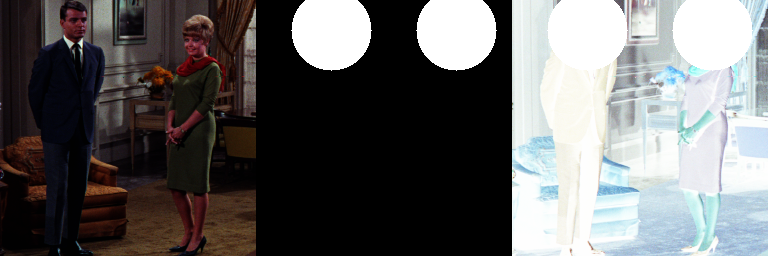

In [102]:
# 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. 
# Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

# NOT AND
original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/couple.tiff')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 30), 40, (255,255,255), -1)
masked = ~original | mask 

mask1 = cv.circle(mask, (200, 30), 40, (255,255,255), -1)
masked = ~original | mask1 


rose_frame = cv.hconcat((original, mask, masked))
cv2_imshow(rose_frame)


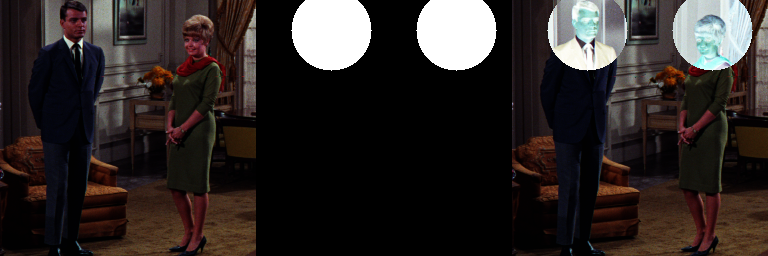

In [103]:
# 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. 
# Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

# NOT OR
original = cv.imread('/content/drive/MyDrive/PCVK/week5/picture/couple.tiff')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 30), 40, (255,255,255), -1)
masked = original ^ mask 

mask1 = cv.circle(mask, (200, 30), 40, (255,255,255), -1)
masked = original ^ mask1 


rose_frame = cv.hconcat((original, mask, masked))
cv2_imshow(rose_frame)


Kesimpulan yang dapat diambil adalah:
1.	Pada operator **OR** gambar yang akan termasking yaitu di bagian dalam lingkaran dan bagian luar lingkaran tidak termasking.
2.	Pada operator **NOT** gambar yang akan termasking yaitu di dalam lingkaran dan terjadi perubahan warna pada bagian luar lingkaran.
3.	Pada operator **NAND** mirip seperti NOT yang dimana akan terjadi proses masking yang terjadi diluar lingkaran dan gambar Darman akan berubah karena inputan yang dilakukan hanya terjadi di dalam lingkaran.
4.	Pada operator **XOR** hanya dilakukan masking pada bagian dalam lingkaran, dan juga mengapa warna pada gambar tidak terlihat seperti gambar asli (RGB) karena operasi XOR memberikan 0 sebagai hasilnya apabila kedua operasi sama dan dan 1 operasi berbeda.